<a href="https://colab.research.google.com/github/thanh-huy/SIC_Excercies/blob/main/Chapter5_307.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
%matplotlib inline


In [ ]:
cancer_data = load_breast_cancer()
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
#Xem xét các biến giải thích
X = cancer_data.data
print(cancer_data['feature_names'])
X.shape

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


(569, 30)

In [ ]:
#Xem xét biến phản hồi
Y = 1 - cancer_data.target
label = list(cancer_data['target_names'])
label.reverse()
# benign - lành tính
# malignant - ác tính
print(label)

[np.str_('benign'), np.str_('malignant')]


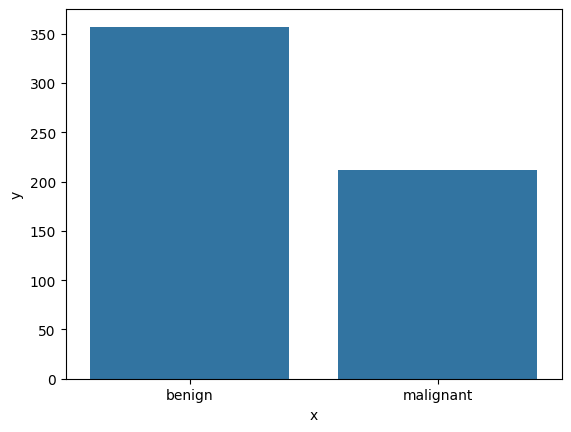

In [ ]:
#Vẽ biểu đồ tần suất
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()
raw_data = {"x":label,'y':table.values}
sns.barplot(x='x',y='y',data=raw_data)
plt.show()

Train và Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)
LL = LogisticRegression(solver='liblinear', max_iter=300)
LL.fit(X_train, Y_train)
Y_pred_test = LL.predict(X_test)
print(Y_pred_test)

[0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1]


Đánh giá độ đo

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_test)
print(conf_mat)

[[101   4]
 [  9  57]]


In [ ]:
#Các độ đo Acc, Sensitivity, Specificty và Precision
#print(classification_report(Y_test, Y_pred_test))
acc = (conf_mat[0,0]+conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print("Acc: {}", format(np.round(acc,3)))
print("Sensitivity: ", format(np.round(sensitivity,3)))
print("Specificity: ", format(np.round(specificity,3)))

Acc: {} 0.924
Sensitivity:  0.864
Specificity:  0.962


Ngưỡng cutoff

In [ ]:
#Output dự đoán sẽ là xác suất đầu ra
Y_pred_test_prob = LL.predict_proba(X_test)[:,1]
Y_pred_test_prob


array([7.37900636e-02, 8.17136658e-05, 4.35440639e-02, 1.41156650e-02,
       2.19273567e-03, 4.52073400e-03, 9.38638943e-01, 1.87945441e-03,
       9.99999999e-01, 9.99994355e-01, 9.99999999e-01, 2.68123982e-02,
       5.38430631e-03, 3.91389445e-02, 2.93661721e-03, 9.99999999e-01,
       2.13252326e-04, 3.61955705e-03, 6.63728950e-04, 9.99991377e-01,
       3.84496291e-03, 9.89252448e-01, 9.99999998e-01, 1.00000000e+00,
       9.99999993e-01, 3.20805396e-01, 9.96379844e-01, 2.67306953e-03,
       1.35854839e-03, 2.27875852e-03, 1.29230573e-02, 1.10246440e-03,
       9.98661796e-01, 1.23006840e-02, 8.25894368e-02, 1.83723814e-02,
       8.79647722e-03, 9.85774300e-01, 8.16932945e-01, 1.38625286e-03,
       9.99943478e-01, 7.79491003e-03, 1.00000000e+00, 1.54189666e-01,
       1.01242637e-01, 2.75808964e-03, 2.11649482e-03, 1.58918181e-01,
       1.00000000e+00, 9.93101644e-02, 5.71553899e-02, 7.26501840e-03,
       4.52960042e-03, 9.99999970e-01, 6.42737098e-01, 3.56721163e-04,
      

In [ ]:
cutoff=0.6 #ngưỡng cutoff 0.7
Y_pred_test_val = (Y_pred_test_prob>cutoff).astype(int)
conf_mat2 = confusion_matrix(Y_test, Y_pred_test_val)
print(conf_mat2)
print(classification_report(Y_test, Y_pred_test_val))

[[104   1]
 [  9  57]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       105
           1       0.98      0.86      0.92        66

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



Đường cong ROC

In [ ]:
#Khởi tạo lưới
cutoff_grid = np.linspace(0.0,1.0, 100)
TPR_grid = []
FPR_grid = []

In [ ]:
for cutoff in cutoff_grid:
    Y_pred_test_val = (Y_pred_test_prob>cutoff).astype(int)
    conf_mat2 = confusion_matrix(Y_test, Y_pred_test_val)
    sensitivity = conf_mat2[1,1]/(conf_mat2[1,0]+conf_mat2[1,1])
    specificity = conf_mat2[0,0]/(conf_mat2[0,0]+conf_mat2[0,1])
    TPR_grid.append(sensitivity)
    FPR_grid.append(1-specificity)

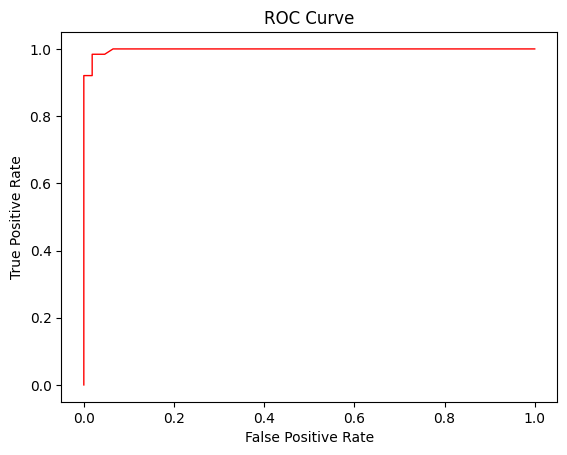

In [ ]:
plt.plot(FPR_grid, TPR_grid,c='red',linewidth=1.0)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

ROC và AUC bằng thư viện sklearn

Text(0.5, 1.0, 'ROC Curve')

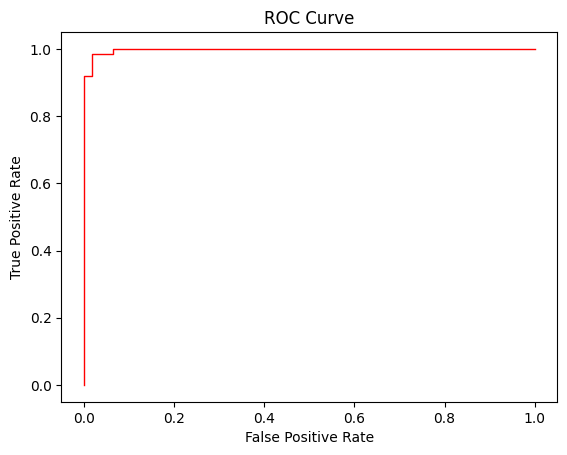

In [ ]:
FPR, TPR,cutoff = roc_curve(Y_test, Y_pred_test_prob,pos_label=1)
plt.plot(FPR, TPR,c='red',linewidth=1.0)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [ ]:
acu = roc_auc_score(Y_test, Y_pred_test_prob)
print(acu)

0.9977954144620812
